## Type-Token Ratio (TTR)

Type-Token Ratio (TTR) is a measure of vocabulary "flexibility" or variability, designed to indicate certain aspects of language adequacy. It expresses the ratio of different words (types) to total words (tokens) in a given language sample. 

If in speaking 100 words (tokens) an individual uses 64 different words (types), their TTR would be 0.64.


## Over-all TTR

The over-all TTR, as computed for an entire language sample. TTR's for samples of different magnitudes are not directly comparable because of the tendency for the TTR to vary inversely with size of sample. To adress this we truncate input text to a certain size before calculating the over-all TTR of a sample.

In [1]:
def calculate_ttr(text, truncate_length=None):
    """
    Calculate the Type-Token Ratio (TTR) for a given text.
    
    Parameters:
    - text (str): The input text.
    - truncate_length (int, optional): The length to which the text should be truncated before calculating TTR.
    
    Returns:
    - float: The TTR of the text.
    """
    # Normalize the text to lowercase to ensure uniformity
    text = text.lower()
    # Tokenize the text into words
    tokens = text.split()
    print("Total Tokens: ", len(tokens))
    
    # If truncate_length is specified and less than the number of tokens, truncate the list of tokens
    if truncate_length is not None and len(tokens) > truncate_length:
        tokens = tokens[:truncate_length]
    
    # Calculate the number of unique words (types)
    types = len(set(tokens))
    # Calculate the total number of words (tokens)
    total_tokens = len(tokens)
    
    # Avoid division by zero
    if total_tokens == 0:
        return 0
    
    # Calculate TTR
    ttr = types / total_tokens
    return ttr

## Mean-Segmetal TTR


TTR's for Samples of different magnitudes can be made comparable by dividing each
sample into like-sized segments of, say, 100 words each, computing the TTR
for each segment and then averaging the segmental TTR's for each sample.

In [2]:
def calculate_mean_segmental_ttr(text, segment_size=50):
    """
    Calculate the mean segmental Type-Token Ratio (TTR) for the given text.
    
    Parameters:
    - text (str): The input text.
    - segment_size (int): The number of words in each text segment.
    
    Returns:
    - float: The mean TTR across all segments.
    """
    # Normalize the text to lowercase and split it into words
    tokens = text.lower().split()
    
    # Split the tokens into segments of the specified size
    segments = [tokens[i:i + segment_size] for i in range(0, len(tokens), segment_size)]
    
    # Compute the TTR for each segment
    ttrs = []
    for segment in segments:
        types = len(set(segment))  # Count unique words
        total_tokens = len(segment)  # Count total words
        ttr = types / total_tokens if total_tokens > 0 else 0  # Compute TTR for the segment
        ttrs.append(ttr)
        
    #print("cm_ttrs: ", ttrs)
    # Compute the mean TTR across all segments
    mean_ttr = sum(ttrs) / len(ttrs) if ttrs else 0
    return mean_ttr

## The Cumulative TTR Curve

The cumulative Type-Token Ratio (TTR) curve is a graphical representation of the cumulative TTR for a given language sample. Here's how it's constructed:

- **Plotting**: Successive TTR values are computed as increments are added to the sample, and these values are plotted on a graph. 

- **Representation**: TTR values are represented along the ordinate (y-axis), while the number of words is represented along the abscissa (x-axis). For easier comparison of 2 curves we use the concept of truncating the length of the input to for the samples to be of same size.

- **Units for Abscissa**: The abscissa values can be in units of one word, ten words, 100 words, etc., depending on preference.

- **Calculation**: If the unit is one word, 1000 TTRs would be computed for a 1000-word sample. If the unit is ten words, 100 TTRs would be computed; if the unit is 100 words, ten TTRs would be computed, and so on.

- **Example**: For instance, if the unit is ten words, the first value on the curve will represent the TTR for the first ten words of the sample, the second value will represent the TTR for the first 20 words, the third will represent the TTR for the first 30 words, and so forth.

The cumulative TTR curve provides insight into how the vocabulary richness of a language sample accumulates as more words are added, allowing for the analysis of overall vocabulary diversity over the course of the sample.


In [3]:
def calculate_cumulative_ttr(text, increment=10, truncate_length=300):
    """
    Compute the cumulative TTR for the text.

    Parameters:
    - text (str): The input text.
    - increment (int): The word increment for computing cumulative TTRs.

    Returns:
    - List of tuples: Each tuple contains (number of words, TTR up to that point).
    """
    # Convert the text to lowercase and split into individual words
    tokens = text.lower().split()

    # If truncate_length is specified and less than the number of tokens, truncate the list of tokens
    if truncate_length is not None and len(tokens) > truncate_length:
        tokens = tokens[:truncate_length]

    # List to hold the cumulative TTR values
    cumulative_ttr_values = []

    # Iterate over the text in the specified word increments
    for i in range(increment, len(tokens) + increment, increment):
        # Ensure not to exceed total length of tokens
        i = min(i, len(tokens))
        #print(i)

        # Slice the tokens up to the current index and calculate TTR
        segment = tokens[:i]
        unique_words = len(set(segment))
        total_words = len(segment)
        ttr = unique_words / total_words if total_words > 0 else 0

        # Append the cumulative TTR value along with the number of words
        cumulative_ttr_values.append((total_words, ttr))

    return cumulative_ttr_values

In [4]:
# Since I can't run the actual Python environment here, I'll provide you with a code snippet that you can run in your local environment.

# Assuming the `cumulative_ttr` function and `sample_text` are already defined as above, here's how you can graph the output:

import matplotlib.pyplot as plt

def plot_cumulative_ttr(cumulative_ttr_values):
    # Unpack the number of words and TTR values
    word_counts, ttr_values = zip(*cumulative_ttr_values)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(word_counts, ttr_values, marker='o')
    
    # Set the title and labels
    plt.title('Cumulative Type-Token Ratio (TTR)')
    plt.xlabel('Number of Words')
    plt.ylabel('TTR')
    
    # Show the grid
    plt.grid(True)
    
    # Show the plot
    plt.show()


## The Decremental TTR Curve

The decremental Type-Token Ratio (TTR) curve is a method of analyzing vocabulary variation over successive segments of a language sample. Here's how it works:

- **Segmentation**: A percentage of the input text i.e. 10%  if a 1000-word sample is divided into ten 100-word segments.

- **Computation of TTR**: TTR is computed for the first segment.

- **Identification of New Types**: For each subsequent segment, the number of different words that did not occur in the previous segment (new types) is determined.

- **Calculation of Segmental TTR**: The TTR for each segment is calculated by dividing the number of new types by the number of tokens (words) in that segment (100 in each case).

- **Analysis**: The resulting curve of successive segmental TTRs is expected to show a steeper slope compared to the cumulative TTR curve. The measure representing the slope of this curve indicates the rate of decrement in the use of new types, reflecting how quickly an individual exhausts their vocabulary in producing a language sample.

- **Significance**: Decremental TTRs provide a direct quantitative measure of one aspect of language development, particularly when applied to language samples obtained successively from the same individuals. The decremental TTR curve is the first derivative of the cumulative TTR curve, eliminating the need to fit a separate curve to the decremental TTR data if the cumulative TTR curve has already been computed.


In [5]:
def calculate_decremental_ttr_dynamic(text, segment_percentage=10):
    """
    Calculate the decremental Type-Token Ratio (TTR) where each segment is a specified percentage of the text length.

    Parameters:
    - text (str): The input text.
    - segment_percentage (int): The percentage of the total text length that each segment should represent.

    Returns:
    - list: A list containing the decremental TTR for each dynamic segment.
    """
    # Normalize text and split into tokens
    tokens = text.lower().split()
    # Determine dynamic segment size based on the specified percentage of the total text length
    segment_size = max(int(len(tokens) * (segment_percentage / 100)), 1)  # Ensure at least one word per segment

    segments = [tokens[i:i + segment_size] for i in range(0, len(tokens), segment_size)]
    
    unique_words = set()
    decremental_ttrs = []

    for segment in segments:
        # Count new unique words in the current segment
        new_unique_words = set(segment) - unique_words
        # Calculate the decremental TTR (number of new unique words / segment size)
        decremental_ttr = len(new_unique_words) / segment_size if segment_size > 0 else 0
        decremental_ttrs.append(decremental_ttr)
        # Update the set of all unique words encountered so far
        unique_words.update(segment)

    return decremental_ttrs

In [6]:
def plot_decremental_ttr(decremental_ttrs):
    """
    Plot the decremental TTR curve.

    Parameters:
    - decremental_ttrs (list): The decremental TTR values for each segment.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(decremental_ttrs) + 1), decremental_ttrs, marker='o')
    plt.title('Decremental Type-Token Ratio (TTR)')
    plt.xlabel('Segment Number')
    plt.ylabel('Decremental TTR')
    plt.grid(True)
    plt.show()


## TTR-Calculation

Total Tokens:  400
Total Tokens:  570
TTR Score 1:  0.62
TTR Score 2:  0.6233333333333333
MS-TTR Score 1:  0.8225000000000001
MS-TTR Score 2:  0.8358333333333333


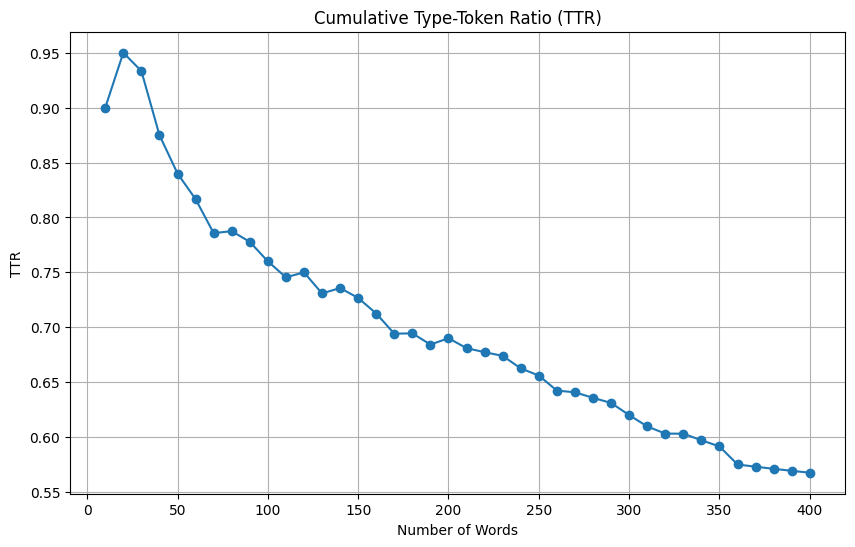

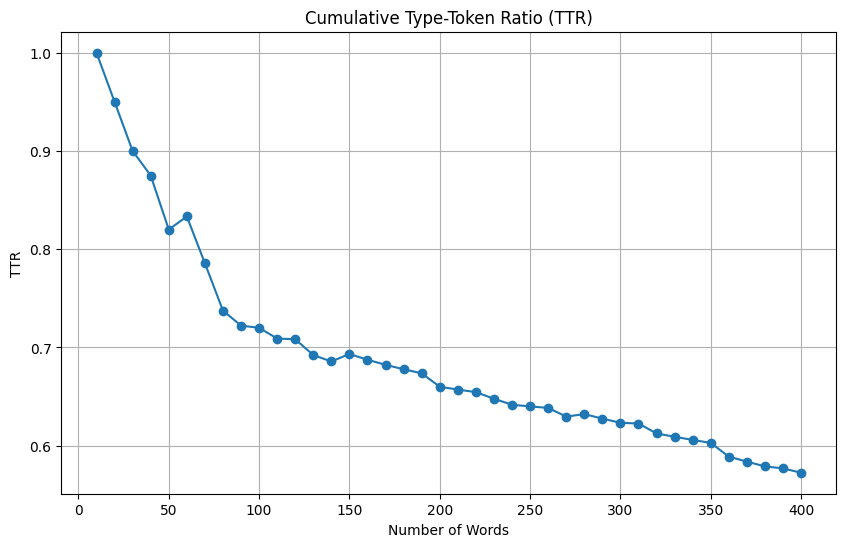

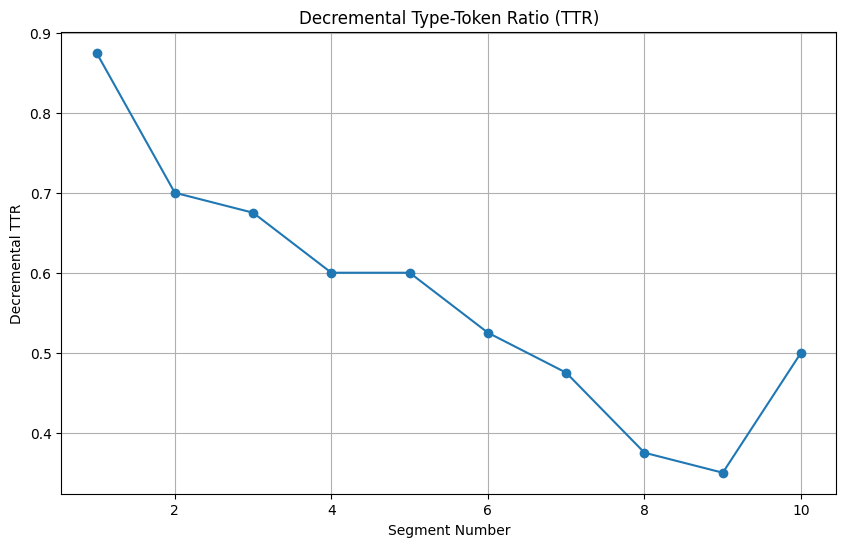

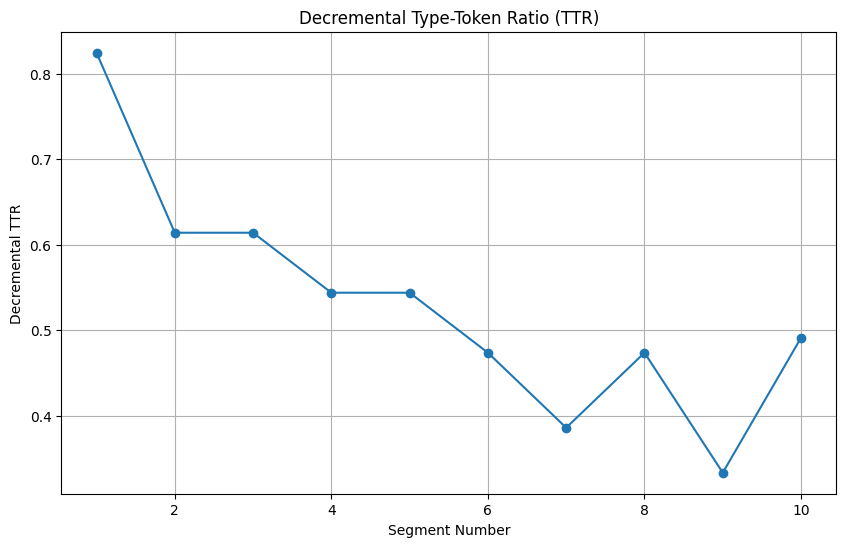

In [7]:
# Example text 
#PROMPT: Generate a Story about love.
#gpt3.5
file_path1 = "/Users/Vas/Documents/Coding_Projects/BA_Experiment_Tests/Metrics/sample1.txt"
#gpt4
file_path2 = "/Users/Vas/Documents/Coding_Projects/BA_Experiment_Tests/Metrics/sample2.txt"

with open(file_path1, 'r', encoding="utf-8") as file:
    text1 = file.read()
with open(file_path2, 'r', encoding="utf-8") as file:
    text2 = file.read()

# Calculate TTR Values
ttr1 = calculate_ttr(text1, truncate_length=300)
ttr2 = calculate_ttr(text2, truncate_length=300)
ms_ttr1 = calculate_mean_segmental_ttr(text1, segment_size=50)
ms_ttr2 = calculate_mean_segmental_ttr(text2, segment_size=50)
cml_ttr_res1 = calculate_cumulative_ttr(text1, increment=10, truncate_length=400)
cml_ttr_res2 = calculate_cumulative_ttr(text2, increment=10, truncate_length=400)
dec_ttr1 = calculate_decremental_ttr_dynamic(text1, segment_percentage=10)
dec_ttr2 = calculate_decremental_ttr_dynamic(text2, segment_percentage=10)

print("TTR Score 1: ", ttr1)
print("TTR Score 2: ", ttr2)
print("MS-TTR Score 1: ", ms_ttr1)
print("MS-TTR Score 2: ", ms_ttr2)
# Plot the cumulative TTR curve
plot_cumulative_ttr(cml_ttr_res1)
plot_cumulative_ttr(cml_ttr_res2)
# Plot the decremental TTR curve
plot_decremental_ttr(dec_ttr1)
plot_decremental_ttr(dec_ttr2)
